<img src="usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
df1=df.drop(['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo',
             'tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
df1.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [4]:
df_VN=df1.apply(lambda x: x.fillna(x.mean()),axis=0)  #dataframe cuyos valores nan por columna han sido reemplazados
                                                      #por el promedio de la respectiva columna  

In [5]:
escala=MinMaxScaler()
columnas=['desplazamiento','cilindros','co2','consumo_litros_milla']
df_VN[columnas]=escala.fit_transform(df_VN[columnas])

In [7]:
df_VN.head() #dataframe al que se le aplicó la noramlización por MinMaxScaler

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,0.142857,0.398014,0.331027
1,1984,0.461538,0.285714,0.527672,0.475113
2,1985,0.243590,0.142857,0.424351,0.360294
3,1985,0.461538,0.285714,0.527672,0.475113
4,1987,0.410256,0.285714,0.424351,0.360294


In [6]:
df2=df.drop(['year','desplazamiento','cilindros','co2','consumo_litros_milla'],axis=1)

In [7]:
df2.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
df_VC=pd.get_dummies(df2)

Sobre el comando get_dummies:

este comando transforma a las variables categóricas de un arreglo o de un dataframe en variables indicativas cuyos valores 
corresponden a 0 o 1 respecto a otras variables.

In [9]:
df_procesado=df_VN.join(df_VC)

In [10]:
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numéricas.\
    b. Moda para las variables numericas
    
    

In [11]:
#se ajusta el modelo de acuerdo al dataframe 
kmeans=KMeans(n_clusters=8)
kmeans.fit(df_procesado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
#cálculo de los clusters y de los centroides
centroides=kmeans.cluster_centers_
clusters=kmeans.labels_

In [13]:
# etiquetar los datos con los clusters encontrados en el dataframe 
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')

In [14]:
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6


In [15]:
lista=df_procesado['cluster'].unique()
lista

[6, 0, 7, 3, 1, 4, 2, 5]
Categories (8, int64): [6, 0, 7, 3, 1, 4, 2, 5]

In [16]:
#primero dividimos el dataframe original en 4 dataframes, con la información de cada grupo de puntos 
ind1=[]
ind2=[]
ind3=[]
ind4=[]
ind5=[]
ind6=[]
ind7=[]
ind8=[]

lista_de_listas_de_indices=[ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8]          #lista de listas vacías

cont=0
for i in lista_de_listas_de_indices:
    for j in df_procesado.index:                              #mediante el doble for guardamos en cada lista vacía
        if df_procesado['cluster'][j]==lista[cont]:           #los índices de los puntos que se corresponden por cluster
            i.append(j)
    cont+=1

In [17]:
df1=df_procesado.filter(items=ind1,axis=0) #dataframe en base al cluster 3
df2=df_procesado.filter(items=ind2,axis=0) #dataframe en base al clsuter 4
df3=df_procesado.filter(items=ind3,axis=0) #dataframe en base al cluster 1                   #creamos dataframes por grupo
df4=df_procesado.filter(items=ind4,axis=0) #dataframe en base al clsuter 2
df5=df_procesado.filter(items=ind5,axis=0) #dataframe en base al cluster 6
df6=df_procesado.filter(items=ind6,axis=0) #dataframe en base al cluster 0
df7=df_procesado.filter(items=ind7,axis=0) #dataframe en base al cluster 5
df8=df_procesado.filter(items=ind8,axis=0) #dataframe en base al cluster 7

In [18]:
lista_de_clusters=['3','4','1','2','6','0','5','7']
lista_dfs=[df1,df2,df3,df4,df5,df6,df7,df8]
lista_variables_numericas=['year','desplazamiento','co2','consumo_litros_milla']

diccionario={'3':[],'4':[],'1':[],'2':[],'6':[],'0':[],'5':[],'7':[]}

#cálculo de media y moda de las variables numericas por cluster
cont=0

for i in lista_dfs:
    for j in lista_variables_numericas:
            media=i[j].mean()      
            moda=i[j].mode()
            diccionario[lista_de_clusters[cont]].append((media,moda))
    cont+=1

diccionario     #diccionario cuyas llaves son los clusters y los valores son listas con tuplas 
                #cuya primera componente es la media y la segunda componente es la moda de la variable
                #en donde la primera tupla corresponde a los valores de media y moda para 'year', la segunda tupla
                #'desplazamiento',la tercera tupla 'co2'y la cuarta tupla 'consumo_litros_milla', por cada lista  

{'3': [(1985.4124704956728,
   0    1985
   dtype: int64),
  (0.33189199834591904,
   0    0.179487
   dtype: float64),
  (0.37241875910132144,
   0    0.353657
   dtype: float64),
  (0.2978558391807832,
   0    0.281734
   dtype: float64)],
 '4': [(1998.0480549199085,
   0    2000
   dtype: int64),
  (0.33692229458819845,
   0    0.179487
   dtype: float64),
  (0.3650477944512275,
   0    0.374603
   dtype: float64),
  (0.2940750864615587,
   0    0.305011
   dtype: float64)],
 '1': [(1992.8972455557725,
   0    1991
   dtype: int64),
  (0.3469878431785054,
   0    0.307692
   dtype: float64),
  (0.37907716222591115,
   0    0.374603
   dtype: float64),
  (0.30819384350528206,
   0    0.305011
   dtype: float64)],
 '2': [(2003.129145532579,
   0    2005
   dtype: int64),
  (0.35130856268195315,
   0    0.307692
   dtype: float64),
  (0.3708551926072227,
   0    0.317749
   dtype: float64),
  (0.3011888492485531,
   0    0.24183
   dtype: float64)],
 '6': [(2011.5189309576838,
   0    

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.


In [19]:
# usando la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,388453.115916
1,10,204768.517905
2,20,167717.937137
3,30,149600.398898
4,50,125960.240803


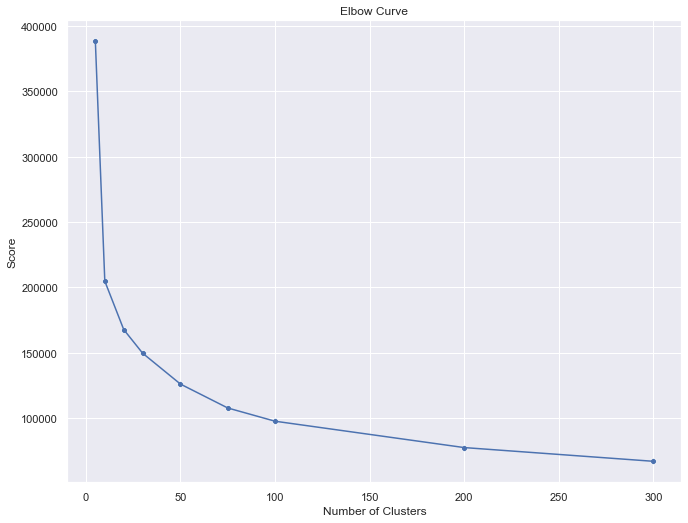

In [21]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Luego por el gráfico obtenido mediante la regla del codo, es posible deducir que el número óptimo de la cantidad de clusters a considerar es 100.